<a href="https://colab.research.google.com/github/AdityaPatki77/Crime-Analysis-USA/blob/main/Crimes_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("gdrive/MyDrive/Crime_Dataset.csv")


<ipython-input-3-04ef726ce75d>:1: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("gdrive/MyDrive/Crime_Dataset.csv")


In [ ]:
data.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

In [ ]:
data.count()

Incident ID               306094
Offence Code              306094
CR Number                 306094
Dispatch Date / Time      257065
NIBRS Code                306094
Victims                   306094
Crime Name1               305822
Crime Name2               305822
Crime Name3               305822
Police District Name      306000
Block Address             279888
City                      304818
State                     306094
Zip Code                  302915
Agency                    306094
Place                     306094
Sector                    304564
Beat                      304564
PRA                       305855
Address Number            279985
Street Prefix              13631
Street Name               306093
Street Suffix               5432
Street Type               305755
Start_Date_Time           306094
End_Date_Time             144436
Latitude                  306094
Longitude                 306094
Police District Number    306094
Location                  306094
dtype: int

In [ ]:
data.shape

(306094, 30)

In [ ]:
data.describe()

,Incident ID,CR Number,Victims,Zip Code,Address Number,Latitude,Longitude
count,3.060940e+05,3.060940e+05,306094.000000,302915.000000,2.799850e+05,306094.000000,306094.000000
mean,2.012369e+08,1.692787e+08,1.022692,20876.535939,8.393001e+03,38.146328,-75.269490
std,8.626185e+04,6.210304e+07,0.192311,170.157722,1.526296e+04,5.974082,11.786118
min,2.010871e+08,1.001107e+07,1.000000,6.000000,1.000000e+00,0.000000,-77.516753
25%,2.011625e+08,1.705431e+08,1.000000,20853.000000,1.600000e+03,39.020392,-77.197117
50%,2.012361e+08,1.900183e+08,1.000000,20878.000000,8.100000e+03,39.072844,-77.099464
75%,2.013109e+08,2.000466e+08,1.000000,20904.000000,1.250000e+04,39.142072,-77.029046
max,2.013872e+08,2.204211e+08,22.000000,29882.000000,2.090600e+06,90.000000,0.000000


In [ ]:
data.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

In [ ]:
data.drop(['End_Date_Time','Start_Date_Time'],axis=1,inplace=True)
data.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,447,12800.0,NaN,MIDDLEBROOK,NaN,RD,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,054,8300.0,NaN,WOODMONT,NaN,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,054,8300.0,NaN,WOODMONT,NaN,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,445,400.0,NaN,QUINCE ORCHARD,NaN,RD,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,017,4800.0,NaN,FALSTONE,NaN,AVE,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


In [ ]:
data[['Date', 'Time']] = data['Dispatch Date / Time'].str.split(' ', 1, expand=True)
data.head()

<ipython-input-11-9bf6b29be5e6>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Date', 'Time']] = data['Dispatch Date / Time'].str.split(' ', 1, expand=True)


,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Date,Time
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,39.177744,-77.265619,5D,"(39.1777, -77.2656)",08/23/2018,09:52:08 PM
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,39.147954,-77.218189,6D,"(39.148, -77.2182)",06/14/2018,10:26:45 PM
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,38.966174,-77.096561,2D,"(38.9662, -77.0966)",09/03/2018,12:06:54 PM


In [ ]:
data.drop('Dispatch Date / Time',axis=1,inplace=True)
data.head()

,Incident ID,Offence Code,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,...,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Date,Time
0,201202980,3550,180042096,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,...,NaN,MIDDLEBROOK,NaN,RD,39.177744,-77.265619,5D,"(39.1777, -77.2656)",08/23/2018,09:52:08 PM
1,201181293,3522,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,NaN,WOODMONT,NaN,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
2,201181293,3562,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,NaN,WOODMONT,NaN,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
3,201193163,3520,180029476,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,...,NaN,QUINCE ORCHARD,NaN,RD,39.147954,-77.218189,6D,"(39.148, -77.2182)",06/14/2018,10:26:45 PM
4,201204355,2204,180043926,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,...,NaN,FALSTONE,NaN,AVE,38.966174,-77.096561,2D,"(38.9662, -77.0966)",09/03/2018,12:06:54 PM


In [ ]:
# data['Date'] = pd.to_datetime(data['Date'])
# data['Time'] = pd.to_datetime(data['Time'])
# # data.head()

In [ ]:
data['Crime Name1'].value_counts()

Crime Against Property    139882
Crime Against Society      68917
Other                      63178
Crime Against Person       30270
Not a Crime                 3575
Name: Crime Name1, dtype: int64

In [ ]:
data['Crime Name2'].value_counts()

All Other Offenses                             72402
Theft From Motor Vehicle                       26275
Drug/Narcotic Violations                       23240
Simple Assault                                 21063
Destruction/Damage/Vandalism of Property       18988
Shoplifting                                    16076
Driving Under the Influence                    14925
All other Larceny                              13951
Theft from Building                            11257
Burglary/Breaking and Entering                  8767
Identity Theft                                  8673
Theft of Motor Vehicle Parts or Accessories     6689
Liquor Law Violations                           6605
Motor Vehicle Theft                             6523
False Pretenses/Swindle/Confidence Game         6429
Disorderly Conduct                              4997
Credit Card/Automatic Teller Machine Fraud      4640
Aggravated Assault                              4352
Trespass of Real Property                     

In [ ]:
data['Crime Name3'].value_counts()

LARCENY - FROM AUTO                                   26275
POLICE INFORMATION                                    18489
ASSAULT - 2ND DEGREE                                  17441
LARCENY - SHOPLIFTING                                 16076
DRUGS - MARIJUANA - POSSESS                           15613
                                                      ...  
COMPOUNDING CRIME                                         1
COMM SEX OFF - TRANSPORT FEMALE INTERSTATE FOR IMM        1
TRANSPORTING DANGEROUS MATERIALS                          1
OBSTRUCT POLICE - WITNESS - DECEIVING                     1
BRIBERY (DESCRIBE OFFENSE)                                1
Name: Crime Name3, Length: 336, dtype: int64

In [ ]:
data.drop('Street Prefix',axis=1,inplace=True)

In [ ]:
data.drop('Street Suffix',axis=1,inplace=True)

In [ ]:
data.head()

,Incident ID,Offence Code,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,...,PRA,Address Number,Street Name,Street Type,Latitude,Longitude,Police District Number,Location,Date,Time
0,201202980,3550,180042096,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,...,447,12800.0,MIDDLEBROOK,RD,39.177744,-77.265619,5D,"(39.1777, -77.2656)",08/23/2018,09:52:08 PM
1,201181293,3522,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,054,8300.0,WOODMONT,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
2,201181293,3562,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,054,8300.0,WOODMONT,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
3,201193163,3520,180029476,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,...,445,400.0,QUINCE ORCHARD,RD,39.147954,-77.218189,6D,"(39.148, -77.2182)",06/14/2018,10:26:45 PM
4,201204355,2204,180043926,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,...,017,4800.0,FALSTONE,AVE,38.966174,-77.096561,2D,"(38.9662, -77.0966)",09/03/2018,12:06:54 PM


In [ ]:
data['Victims'].unique()

array([ 1,  2,  4,  3,  5,  8,  7,  6, 12, 22])

In [ ]:
data.isna().sum()

Incident ID                   0
Offence Code                  0
CR Number                     0
NIBRS Code                    0
Victims                       0
Crime Name1                 272
Crime Name2                 272
Crime Name3                 272
Police District Name         94
Block Address             26206
City                       1276
State                         0
Zip Code                   3179
Agency                        0
Place                         0
Sector                     1530
Beat                       1530
PRA                         239
Address Number            26109
Street Name                   1
Street Type                 339
Latitude                      0
Longitude                     0
Police District Number        0
Location                      0
Date                      49029
Time                      49029
dtype: int64

In [ ]:
data = data.dropna(subset=['Street Name'])

In [ ]:
data.isna().sum()

Incident ID                   0
Offence Code                  0
CR Number                     0
NIBRS Code                    0
Victims                       0
Crime Name1                 272
Crime Name2                 272
Crime Name3                 272
Police District Name         94
Block Address             26205
City                       1275
State                         0
Zip Code                   3179
Agency                        0
Place                         0
Sector                     1530
Beat                       1530
PRA                         239
Address Number            26109
Street Name                   0
Street Type                 338
Latitude                      0
Longitude                     0
Police District Number        0
Location                      0
Date                      49029
Time                      49029
dtype: int64

In [ ]:
data.head()

,Incident ID,Offence Code,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,...,PRA,Address Number,Street Name,Street Type,Latitude,Longitude,Police District Number,Location,Date,Time
0,201202980,3550,180042096,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,...,447,12800.0,MIDDLEBROOK,RD,39.177744,-77.265619,5D,"(39.1777, -77.2656)",08/23/2018,09:52:08 PM
1,201181293,3522,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,054,8300.0,WOODMONT,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
2,201181293,3562,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,054,8300.0,WOODMONT,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
3,201193163,3520,180029476,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,...,445,400.0,QUINCE ORCHARD,RD,39.147954,-77.218189,6D,"(39.148, -77.2182)",06/14/2018,10:26:45 PM
4,201204355,2204,180043926,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,...,017,4800.0,FALSTONE,AVE,38.966174,-77.096561,2D,"(38.9662, -77.0966)",09/03/2018,12:06:54 PM


In [ ]:
df = pd.DataFrame(data)
df['Date'].fillna(method='ffill', inplace=True)
df['Time'].fillna(method='ffill', inplace=True)

df['Date'].fillna(method='bfill', inplace=True)
df['Time'].fillna(method='bfill', inplace=True)

In [ ]:
data.head()

,Incident ID,Offence Code,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,...,PRA,Address Number,Street Name,Street Type,Latitude,Longitude,Police District Number,Location,Date,Time
0,201202980,3550,180042096,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,12800 BLK MIDDLEBROOK RD,...,447,12800.0,MIDDLEBROOK,RD,39.177744,-77.265619,5D,"(39.1777, -77.2656)",08/23/2018,09:52:08 PM
1,201181293,3522,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,054,8300.0,WOODMONT,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
2,201181293,3562,180015424,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,8300 BLK WOODMONT AVE,...,054,8300.0,WOODMONT,AVE,38.992693,-77.097063,2D,"(38.9927, -77.0971)",03/30/2018,01:00:55 AM
3,201193163,3520,180029476,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,400 BLK QUINCE ORCHARD RD,...,445,400.0,QUINCE ORCHARD,RD,39.147954,-77.218189,6D,"(39.148, -77.2182)",06/14/2018,10:26:45 PM
4,201204355,2204,180043926,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,4800 BLK FALSTONE AVE,...,017,4800.0,FALSTONE,AVE,38.966174,-77.096561,2D,"(38.9662, -77.0966)",09/03/2018,12:06:54 PM


In [ ]:
data.isna().sum()

Incident ID                   0
Offence Code                  0
CR Number                     0
NIBRS Code                    0
Victims                       0
Crime Name1                 272
Crime Name2                 272
Crime Name3                 272
Police District Name         94
Block Address             26205
City                       1275
State                         0
Zip Code                   3179
Agency                        0
Place                         0
Sector                     1530
Beat                       1530
PRA                         239
Address Number            26109
Street Name                   0
Street Type                 338
Latitude                      0
Longitude                     0
Police District Number        0
Location                      0
Date                          0
Time                          0
dtype: int64

In [ ]:
data.drop(['Block Address','Address Number'],axis=1,inplace=True)

In [ ]:
data.isna().sum()

Incident ID                  0
Offence Code                 0
CR Number                    0
NIBRS Code                   0
Victims                      0
Crime Name1                272
Crime Name2                272
Crime Name3                272
Police District Name        94
City                      1275
State                        0
Zip Code                  3179
Agency                       0
Place                        0
Sector                    1530
Beat                      1530
PRA                        239
Street Name                  0
Street Type                338
Latitude                     0
Longitude                    0
Police District Number       0
Location                     0
Date                         0
Time                         0
dtype: int64

In [ ]:

mode = data['City'].mode()[0]

data['City'].fillna(mode, inplace=True)

In [ ]:
mode_value = data['Zip Code'].mode()[0]
data['Zip Code'].fillna(mode_value, inplace=True)


In [ ]:
mode_value = data['Sector'].mode()[0]
data['Sector'].fillna(mode_value, inplace=True)

mode_value = data['Beat'].mode()[0]
data['Beat'].fillna(mode_value, inplace=True)

mode_value = data['PRA'].mode()[0]
data['PRA'].fillna(mode_value, inplace=True)


In [ ]:
mode_value = data['Street Type'].mode()[0]
data['Street Type'].fillna(mode_value, inplace=True)

mode_value = data['Police District Name'].mode()[0]
data['Police District Name'].fillna(mode_value, inplace=True)


In [ ]:
data.isna().sum()

Incident ID                 0
Offence Code                0
CR Number                   0
NIBRS Code                  0
Victims                     0
Crime Name1               272
Crime Name2               272
Crime Name3               272
Police District Name        0
City                        0
State                       0
Zip Code                    0
Agency                      0
Place                       0
Sector                      0
Beat                        0
PRA                         0
Street Name                 0
Street Type                 0
Latitude                    0
Longitude                   0
Police District Number      0
Location                    0
Date                        0
Time                        0
dtype: int64

In [ ]:
# one-hot encoding

data = pd.get_dummies(data, columns=['Crime Name1', 'Crime Name2', 'Crime Name3'])

In [ ]:
data.head()

,Incident ID,Offence Code,CR Number,NIBRS Code,Victims,Police District Name,City,State,Zip Code,Agency,...,Crime Name3_WEAPON - EXPLOSIVES - USING,Crime Name3_WEAPON - FIRING,Crime Name3_WEAPON - INCENDIARY DEVICE - POSSESS,Crime Name3_WEAPON - INCENDIARY DEVICE - USING,Crime Name3_WEAPON - POSSESSION,Crime Name3_WEAPON - SELLING,Crime Name3_WEAPON - THREAT TO BOMB,Crime Name3_WEAPON - THREAT TO BURN,Crime Name3_WEAPON OFFENSE (DESCRIBE OFFENSE),Crime Name3_WEAPON TRAFFICKING
0,201202980,3550,180042096,35B,1,GERMANTOWN,GERMANTOWN,MD,20874.0,MCPD,...,0,0,0,0,0,0,0,0,0,0
1,201181293,3522,180015424,35A,1,BETHESDA,BETHESDA,MD,20814.0,MCPD,...,0,0,0,0,0,0,0,0,0,0
2,201181293,3562,180015424,35A,1,BETHESDA,BETHESDA,MD,20814.0,MCPD,...,0,0,0,0,0,0,0,0,0,0
3,201193163,3520,180029476,35A,1,MONTGOMERY VILLAGE,GAITHERSBURG,MD,20878.0,GPD,...,0,0,0,0,0,0,0,0,0,0
4,201204355,2204,180043926,220,1,BETHESDA,CHEVY CHASE,MD,20815.0,MCPD,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isna().sum()

Incident ID                                      0
Offence Code                                     0
CR Number                                        0
NIBRS Code                                       0
Victims                                          0
                                                ..
Crime Name3_WEAPON - SELLING                     0
Crime Name3_WEAPON - THREAT TO BOMB              0
Crime Name3_WEAPON - THREAT TO BURN              0
Crime Name3_WEAPON OFFENSE (DESCRIBE OFFENSE)    0
Crime Name3_WEAPON TRAFFICKING                   0
Length: 422, dtype: int64

  # Q1. What are the top police districts with the highest number of reported crimes?

In [ ]:
data[["Victims", "Zip Code", "Latitude", "Longitude"]].describe()

,Victims,Zip Code,Latitude,Longitude
count,306093.000000,306093.000000,306093.000000,306093.000000
mean,1.022692,20876.883568,38.146159,-75.269532
std,0.192311,169.306074,5.973357,11.786114
min,1.000000,6.000000,0.000000,-77.516753
25%,1.000000,20853.000000,39.020392,-77.197117
50%,1.000000,20878.000000,39.072844,-77.099464
75%,1.000000,20904.000000,39.142072,-77.029046
max,22.000000,29882.000000,39.342140,0.000000


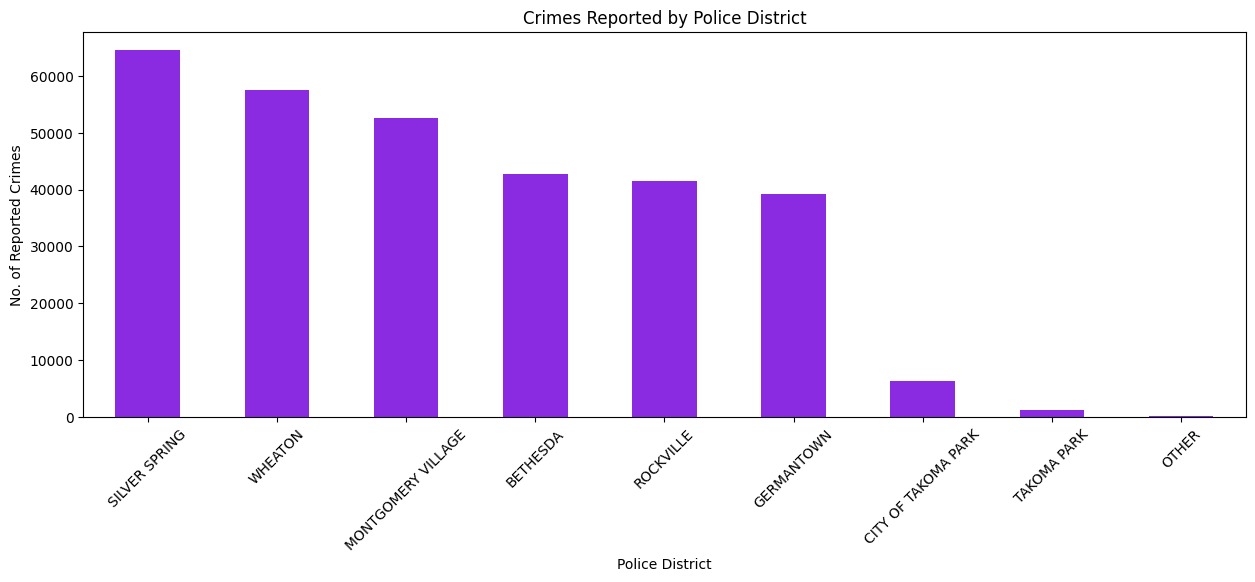

In [ ]:
crime_count = data['Police District Name'].value_counts()

plt.figure(figsize=(15,5))
crime_count.plot(kind='bar',color='blueviolet')
plt.title('Crimes Reported by Police District')
plt.xlabel('Police District')
plt.ylabel('No. of Reported Crimes')
plt.xticks(rotation=45)
plt.show()


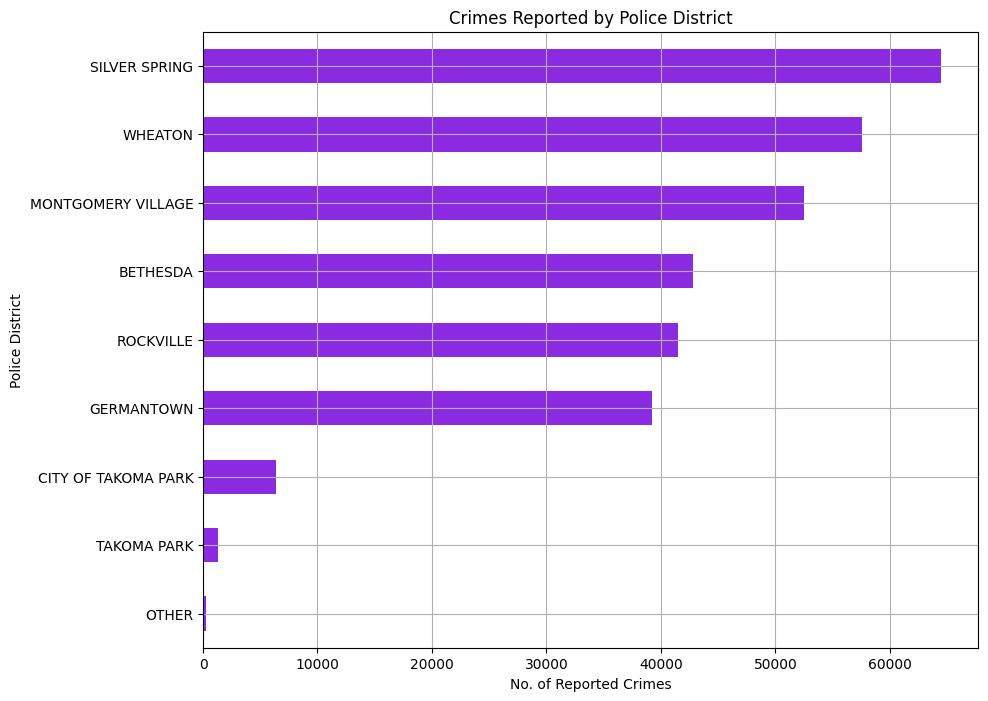

In [ ]:
crime_count = data['Police District Name'].value_counts()

plt.figure(figsize=(10, 8))
crime_count.sort_values().plot(kind='barh', color='blueviolet')
plt.title('Crimes Reported by Police District')
plt.xlabel('No. of Reported Crimes')
plt.ylabel('Police District')
plt.grid(True)
plt.show()

# Q2. What are the most common crime types reported in the dataset?

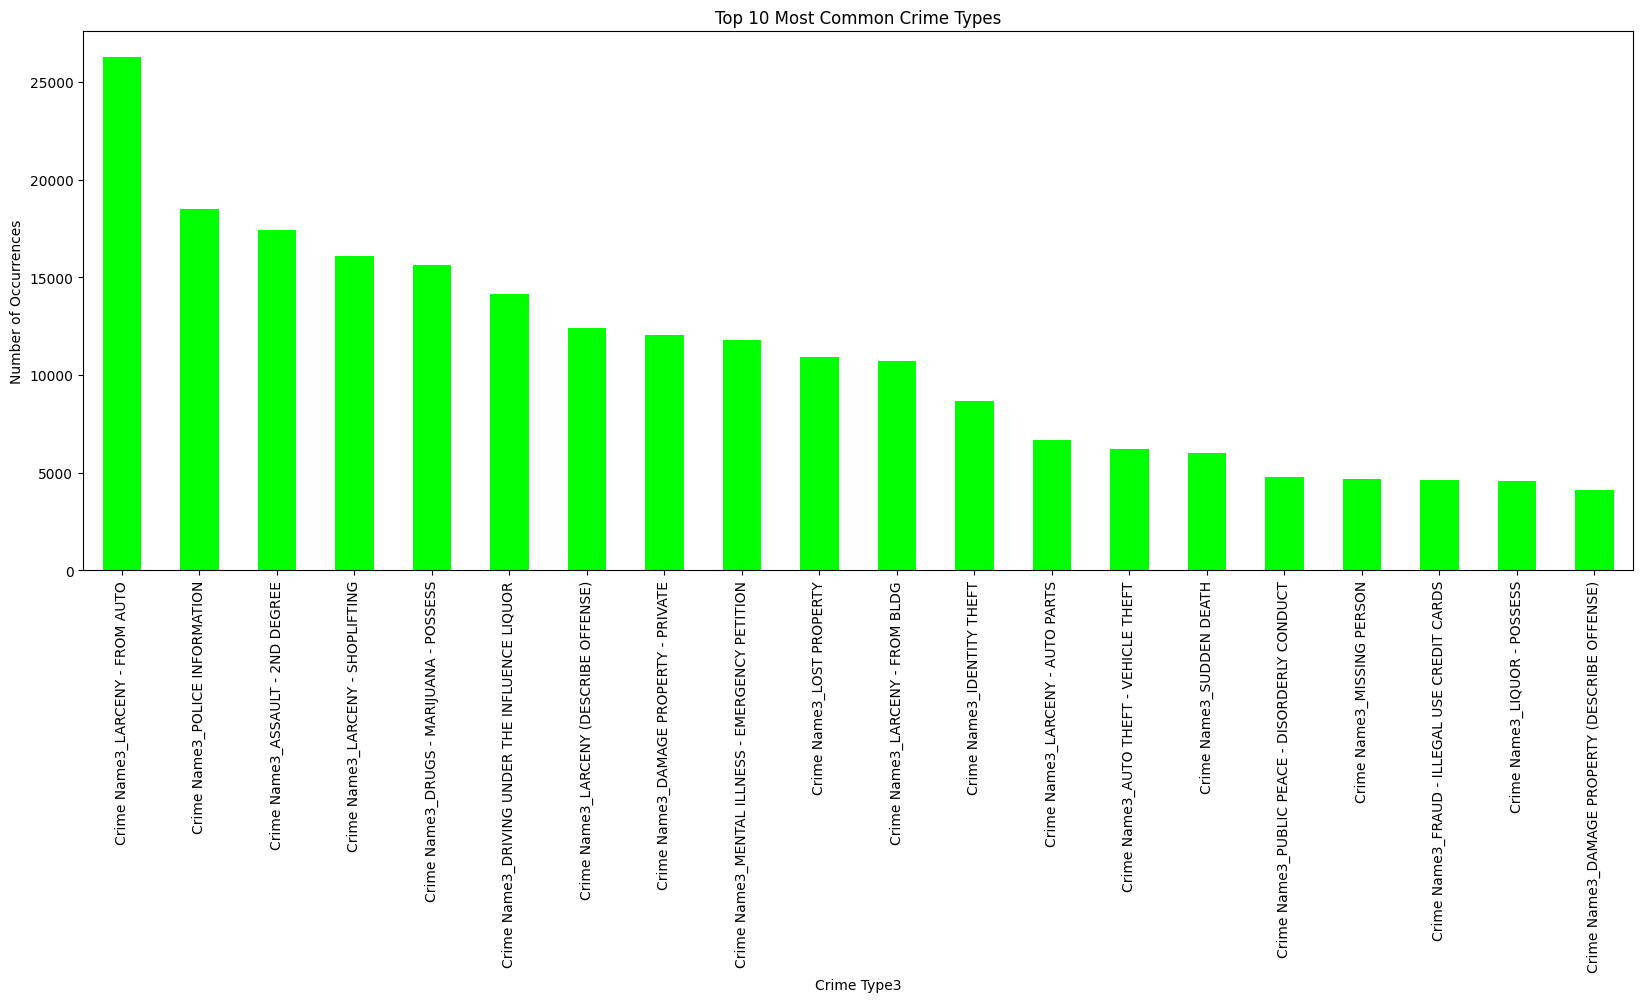

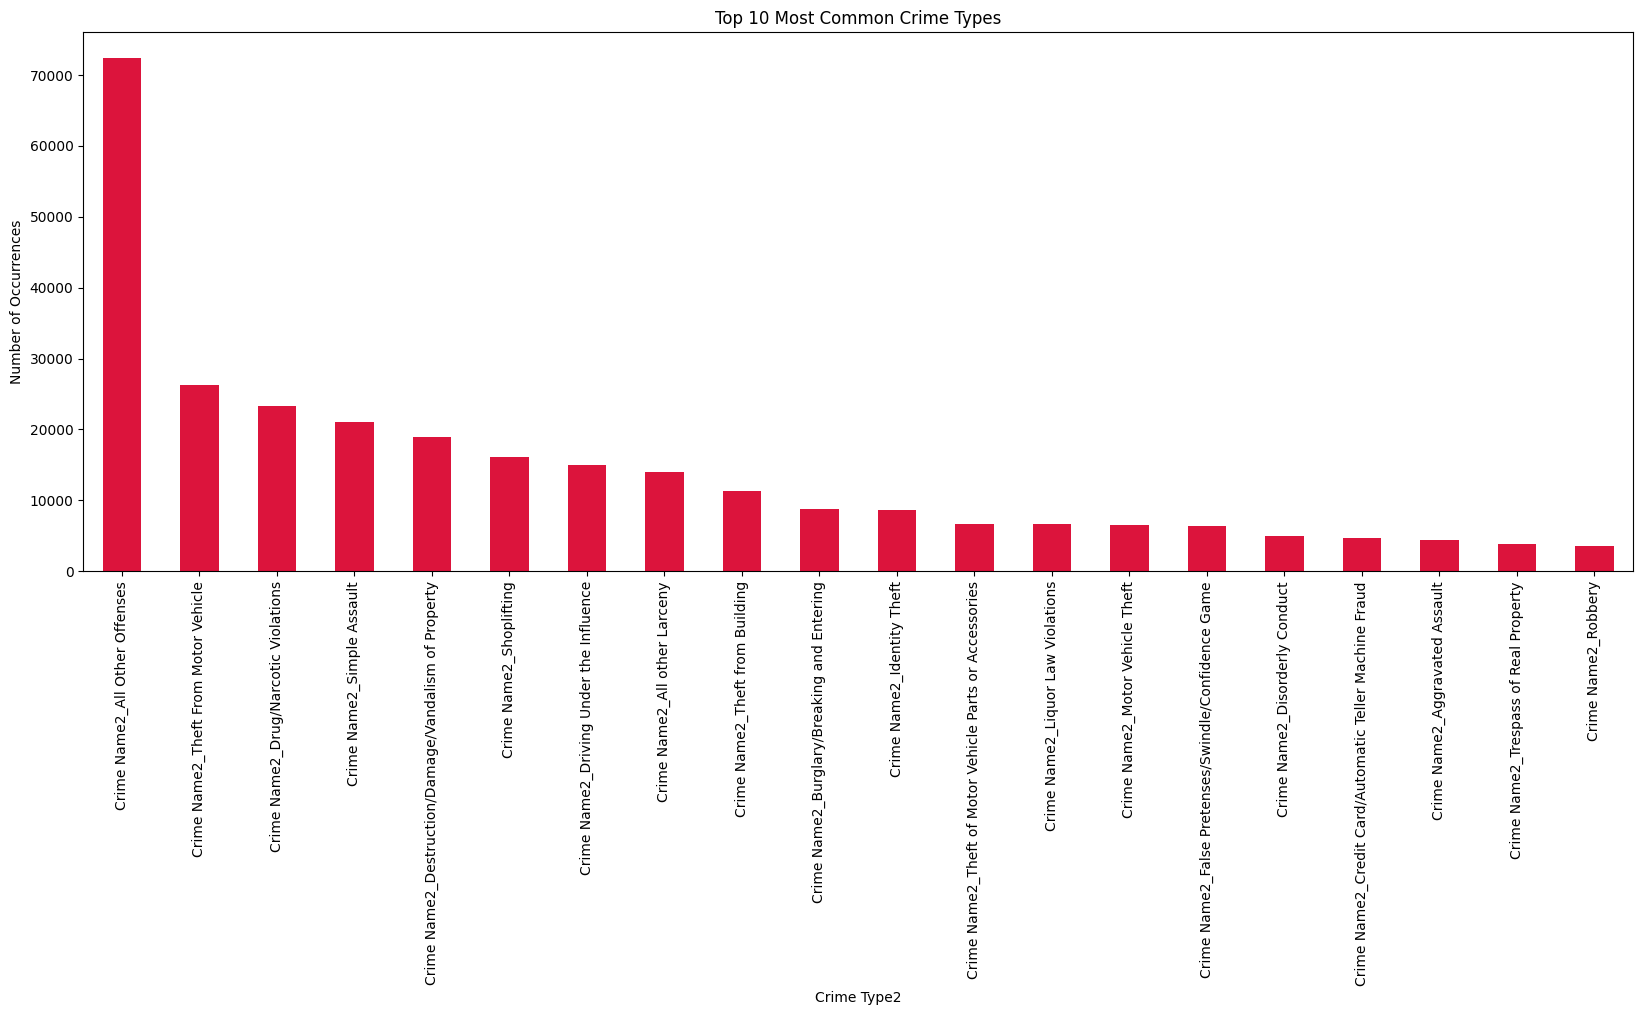

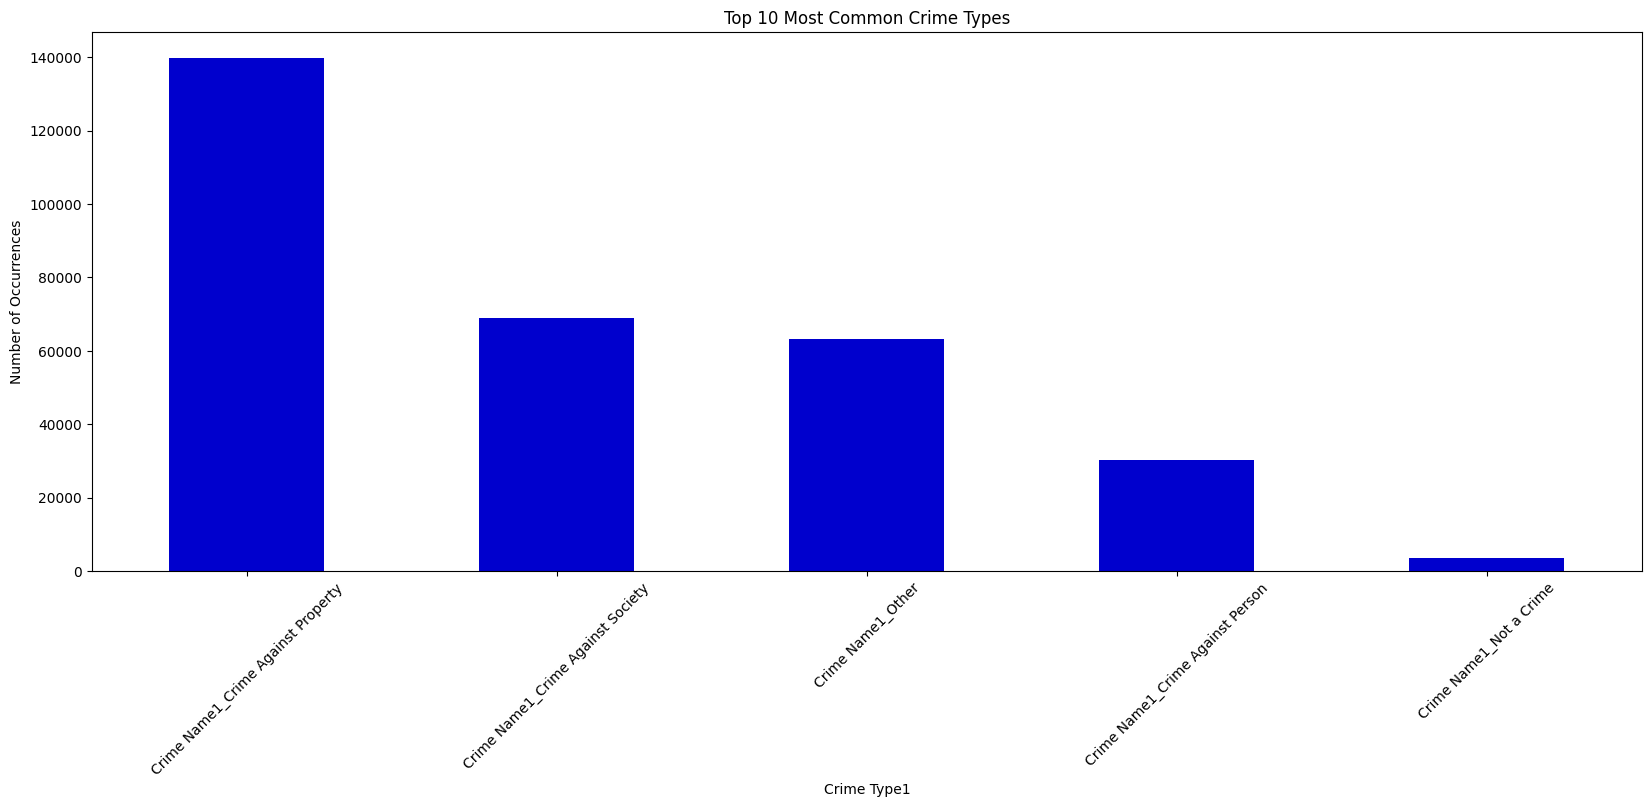

In [ ]:
crime_type_columns = data.filter(like='Crime Name3_')
crime_type_columns1 = data.filter(like='Crime Name2_')
crime_type_columns2 = data.filter(like='Crime Name1_')

crime_type_counts = crime_type_columns.sum()
crime_type_counts1 = crime_type_columns1.sum()
crime_type_counts2 = crime_type_columns2.sum()

crime_type_counts = crime_type_counts.sort_values(ascending=False)
crime_type_counts1 = crime_type_counts1.sort_values(ascending=False)
crime_type_counts2 = crime_type_counts2.sort_values(ascending=False)

plt.figure(figsize=(20, 7))
crime_type_counts.head(20).plot(kind='bar',color='lime')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Type3')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()
print()

plt.figure(figsize=(20, 7))
crime_type_counts1.head(20).plot(kind='bar',color='crimson')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Type2')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()
print()

plt.figure(figsize=(20, 7))
crime_type_counts2.head(20).plot(kind='bar',color='mediumblue')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Type1')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


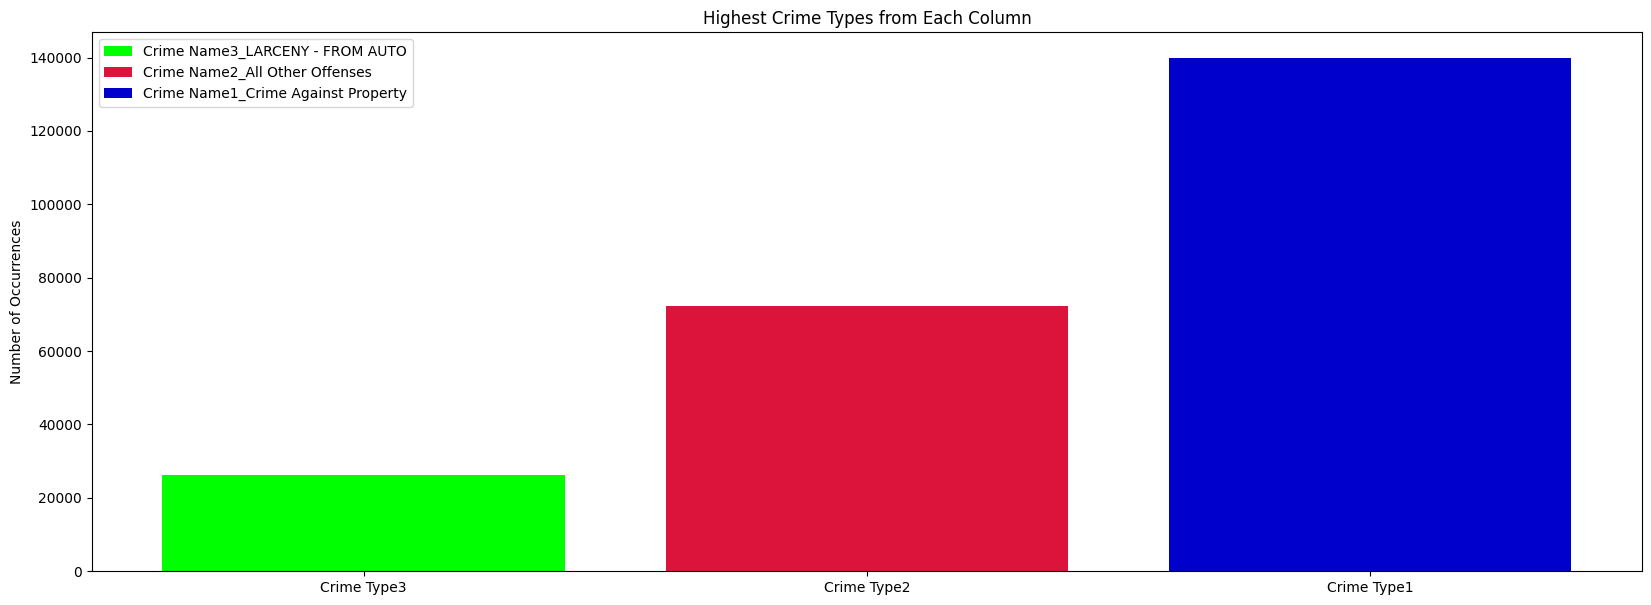

In [ ]:
crime_type_columns = data.filter(like='Crime Name3_')
crime_type_columns1 = data.filter(like='Crime Name2_')
crime_type_columns2 = data.filter(like='Crime Name1_')

crime_type_counts = crime_type_columns.sum()
crime_type_counts1 = crime_type_columns1.sum()
crime_type_counts2 = crime_type_columns2.sum()

crime_type_counts = crime_type_counts.sort_values(ascending=False)
crime_type_counts1 = crime_type_counts1.sort_values(ascending=False)
crime_type_counts2 = crime_type_counts2.sort_values(ascending=False)

top_crime_type3 = crime_type_counts.index[0]
top_crime_type2 = crime_type_counts1.index[0]
top_crime_type1 = crime_type_counts2.index[0]

plt.figure(figsize=(20, 7))
ax = plt.subplot(111)
ax.bar('Crime Type3', crime_type_counts[0], color='lime', label=f'{top_crime_type3}')
ax.bar('Crime Type2', crime_type_counts1[0], color='crimson', label=f'{top_crime_type2}')
ax.bar('Crime Type1', crime_type_counts2[0], color='mediumblue', label=f'{top_crime_type1}')

ax.set_ylabel('Number of Occurrences')
ax.set_title('Highest Crime Types from Each Column')
ax.legend()

plt.show()

# Q3. What are the areas with the highest crime rates based on Zip Code?

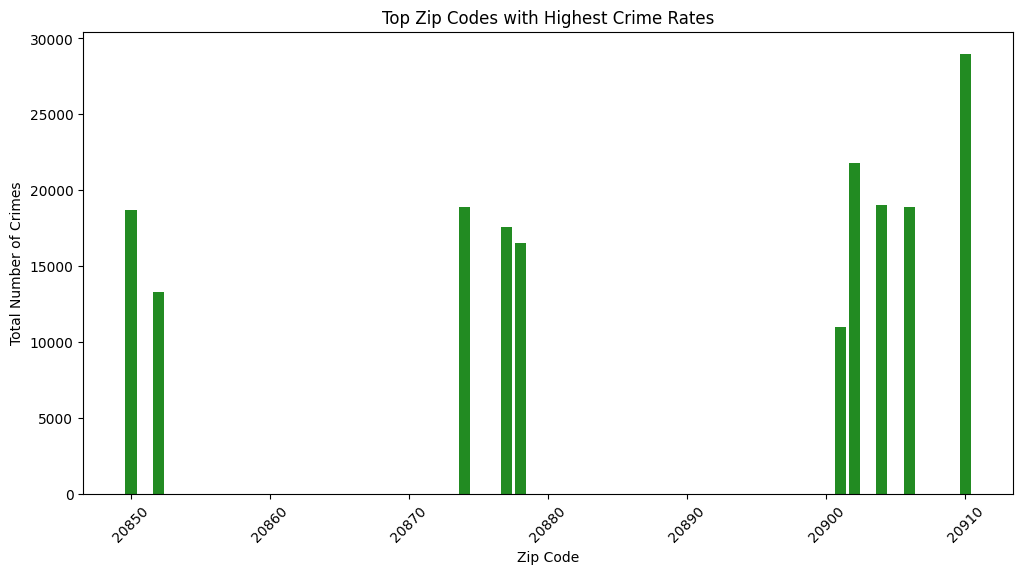

In [ ]:
zip_code_crime = data.groupby('Zip Code')['Incident ID'].count().reset_index()
zip_code_crime.rename(columns={'Incident ID': 'Crime Count'}, inplace=True)

zip_code_crime = zip_code_crime.sort_values(by='Crime Count', ascending=False)

plt.figure(figsize=(12, 6))
top_zip_codes = zip_code_crime.head(10)
plt.bar(top_zip_codes['Zip Code'], top_zip_codes['Crime Count'],color='forestgreen')
plt.title('Top Zip Codes with Highest Crime Rates')
plt.xlabel('Zip Code')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.show()

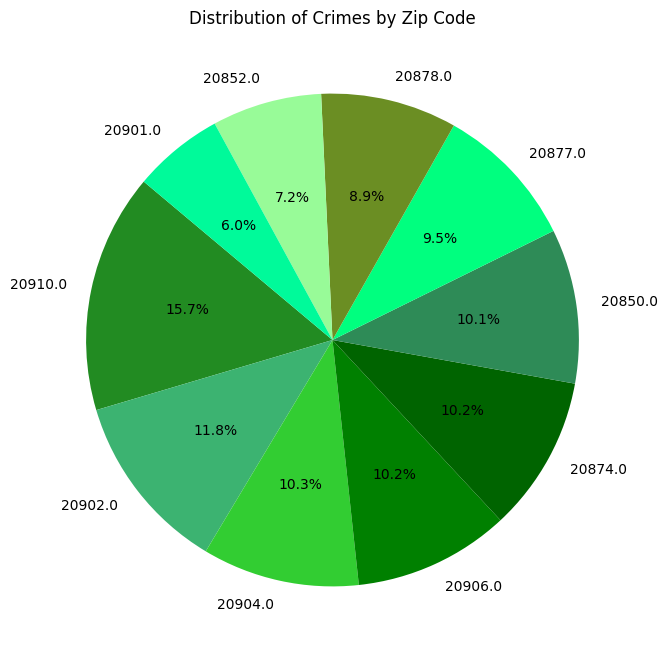

In [ ]:
plt.figure(figsize=(8, 8))
colors = ['forestgreen', 'mediumseagreen', 'limegreen', 'green', 'darkgreen', 'seagreen', 'springgreen', 'olivedrab', 'palegreen', 'mediumspringgreen']
plt.pie(top_zip_codes['Crime Count'], labels=top_zip_codes['Zip Code'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Crimes by Zip Code')
plt.show()

# Q4. Are there any correlations between the number of victims, Zip Code, and other variables?

In [ ]:
variables = ['Victims', 'Zip Code','HourOfDay', 'Offence Code']

pearson_correlations = data[variables].corr(method='pearson')

spearman_correlations = data[variables].corr(method='spearman')

print("Pearson Correlations:")
print(pearson_correlations)
print("\nSpearman Correlations:")
print(spearman_correlations)

<ipython-input-81-235a8bcfbe54>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_correlations = data[variables].corr(method='pearson')
<ipython-input-81-235a8bcfbe54>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_correlations = data[variables].corr(method='spearman')


Pearson Correlations:
            Victims  Zip Code  HourOfDay
Victims    1.000000  0.002225   0.002319
Zip Code   0.002225  1.000000   0.004974
HourOfDay  0.002319  0.004974   1.000000

Spearman Correlations:
            Victims  Zip Code  HourOfDay
Victims    1.000000  0.005641   0.006084
Zip Code   0.005641  1.000000  -0.002924
HourOfDay  0.006084 -0.002924   1.000000


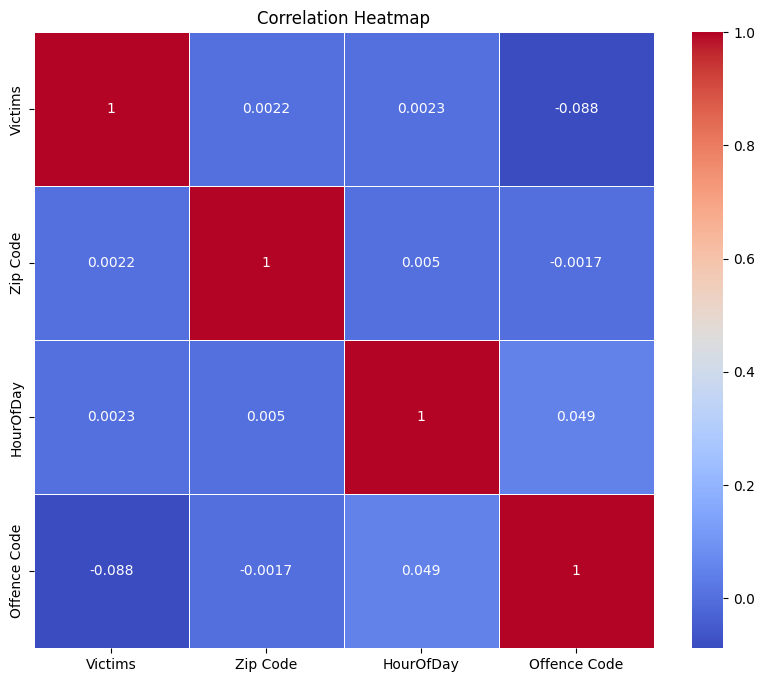

In [ ]:
columns = ['Victims', 'Zip Code', 'HourOfDay', 'Offence Code']

sub_data = data[columns]

sub_data = sub_data.apply(pd.to_numeric, errors='coerce')

correlation_matrix = sub_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(data.columns)


Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Police District Name', 'City', 'State', 'Zip Code', 'Agency',
       ...
       'Crime Name3_WEAPON - INCENDIARY DEVICE - USING',
       'Crime Name3_WEAPON - POSSESSION', 'Crime Name3_WEAPON - SELLING',
       'Crime Name3_WEAPON - THREAT TO BOMB',
       'Crime Name3_WEAPON - THREAT TO BURN',
       'Crime Name3_WEAPON OFFENSE (DESCRIBE OFFENSE)',
       'Crime Name3_WEAPON TRAFFICKING', 'Datetime', 'DayOfWeek', 'HourOfDay'],
      dtype='object', length=425)


# Q5. How does the number of reported crimes change over the years?

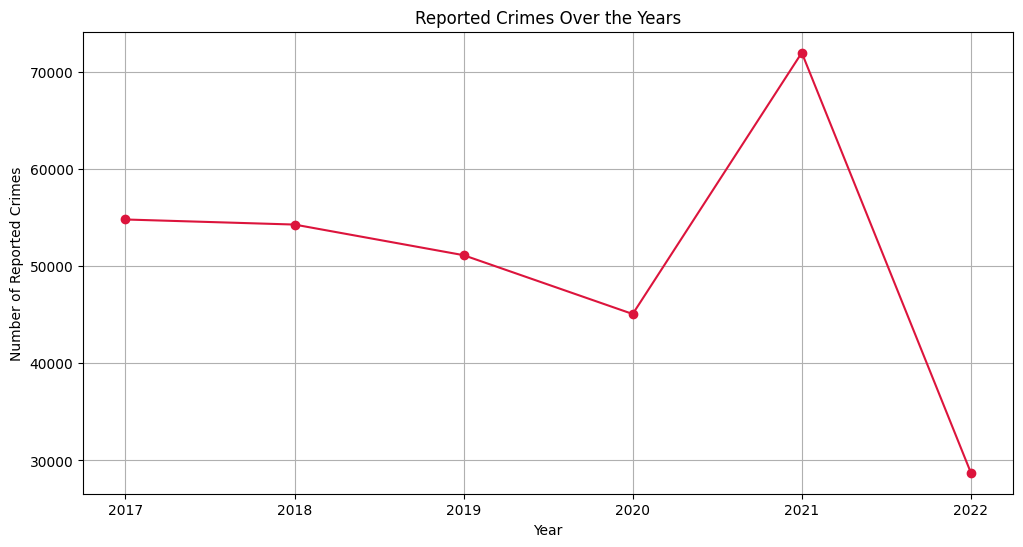

In [ ]:
data['Year'] = data['Datetime'].dt.year

crimes_by_year = data['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(crimes_by_year.index, crimes_by_year.values, marker='o', linestyle='-',color='crimson')
plt.title('Reported Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reported Crimes')
plt.grid(True)
plt.show()

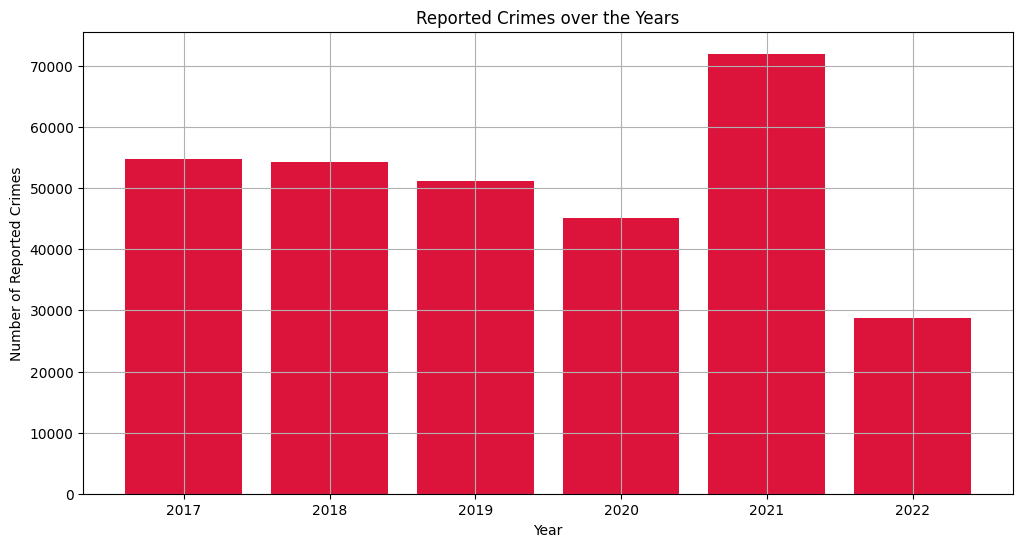

In [ ]:
data['Year'] = data['Datetime'].dt.year

crimes_by_year = data['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(crimes_by_year.index, crimes_by_year.values,color='crimson')
plt.title('Reported Crimes over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reported Crimes')
plt.grid(True)
plt.show()